<center>
<img src="https://github.com/shravankoninti/mlcourse.ai-1/blob/master/img/ods_stickers.jpg?raw=1" />
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 
Authors: [Yury Kashnitskiy](https://yorko.github.io) (@yorko), Yury Isakov. Edited by Anna Tarelina (@feuerengel), and Kolchenko Sergey (@KolchenkoSergey). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center> Assignment #2. Spring 2019
## <center>  Competition 1. User Identification with Logistic Regression <br>(beating baselines in the "Alice" competition)

    
Today we are going to practice working with sparse matrices, training Logistic Regression models, and doing feature engineering. We will reproduce a couple of baselines in the  Kaggle Inclass competition ["Catch Me If You Can: Intruder Detection through Webpage Session Tracking"](https://www.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2) (a.k.a. "Alice"). More credits will be given for beating stronger baselines. 

Prior to working on the assignment, you'd better check out the corresponding course material:
 1. [Classification, Decision Trees and k Nearest Neighbors](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic03_decision_trees_kNN/topic3_decision_trees_kNN.ipynb?flush_cache=true), the same as an interactive web-based [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-3-decision-trees-and-knn) (basics of machine learning are covered here)
 2. Linear classification and regression in 5 parts: 
    - [ordinary least squares](https://www.kaggle.com/kashnitsky/topic-4-linear-models-part-1-ols)
    - [linear classification](https://www.kaggle.com/kashnitsky/topic-4-linear-models-part-2-classification)
    - [regularization](https://www.kaggle.com/kashnitsky/topic-4-linear-models-part-3-regularization)
    - [logistic regression: pros and cons](https://www.kaggle.com/kashnitsky/topic-4-linear-models-part-4-more-of-logit)
    - [validation](https://www.kaggle.com/kashnitsky/topic-4-linear-models-part-5-validation)
 3. You can also practice with demo assignments, which are simpler and already shared with solutions: 
    - " Sarcasm detection with logistic regression": [assignment](https://www.kaggle.com/kashnitsky/a4-demo-sarcasm-detection-with-logit) + [solution](https://www.kaggle.com/kashnitsky/a4-demo-sarcasm-detection-with-logit-solution)
    - "Linear regression as optimization": [assignment](https://www.kaggle.com/kashnitsky/a4-demo-linear-regression-as-optimization/edit) (solution cannot be officially shared)
    - "Exploring OLS, Lasso and Random Forest in a regression task": [assignment](https://www.kaggle.com/kashnitsky/a6-demo-linear-models-and-rf-for-regression) + [solution](https://www.kaggle.com/kashnitsky/a6-demo-regression-solution)
 4. Alice baseline with logistic regression and "bag of sites", [Kernel](https://www.kaggle.com/kashnitsky/alice-logistic-regression-baseline)
 5. Correct time-aware cross-validation scheme, more features, and hyperparameter optimization, [Kernel](https://www.kaggle.com/kashnitsky/correct-time-aware-cross-validation-scheme)
 6. Other [Kernels](https://www.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2/kernels?sortBy=voteCount&group=everyone&pageSize=20&competitionId=7173) in this competition. You can share yours as well, but not high-performing ones (Public LB MAE shall be < 0.95). Please don't spoil the competitive spirit. 
 7. If that's still not enough, watch two videos on logistic regression: [mlcourse.ai/video](https://mlcourse.ai/video)

**Your task:**
 1. "Follow me". Complete the missing code and submit your answers via [the google form](https://docs.google.com/forms/d/15PVw9CYlX6QnxRHKIDS161kGAq3v7iiO15W3qKTePEY). Use **the same email** as in A1 (for newcomers: remember your email and use it for all forms during the course). 12 credits max. for this part
 2. "Freeride". Come up with good features to beat the baselines "A2 baseline (10 credits)" (**0.95640** Public LB ROC-AUC, press "Load more" in the bottom of the [Leaderboard](https://www.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2/leaderboard) to actually see it) and "A2 strong baseline (20 credits)" (**0.95965** Public LB ROC-AUC). As names suggest, you'll get 10 more credits for beating the first one, and 10 more (20 in total) for beating the second one. You need to name your [team](https://www.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2/team) (out of 1 person) in full accordance with the [course rating](https://docs.google.com/spreadsheets/d/1LAy1eK8vIONzIWgcCEaVmhKPSj579zK5lrECf_tQT60/edit?usp=sharing) (for newcomers: you need to name your team with your real full name). You can think of it as a part of the assignment.
 3. If you've beaten "A2 baseline (10 credits)" or performed better, you need to upload your solution as described in [course roadmap](https://mlcourse.ai/roadmap) ("Kaggle Inclass Competition Alice" -> Rules). For all baselines that you see on Public Leaderboard, it's OK to beat them on Public LB as well. But 10 winners will be defined according to the private LB, which will be revealed by @yorko on March 11. 
 
### <center> Deadline for A2: 2019 March 10, 20:59 GMT (London time)

# Part 1. Follow me

<img src='https://github.com/shravankoninti/mlcourse.ai-1/blob/master/img/followme_alice.png?raw=1' width=50%>

*image credit [@muradosmann](https://www.instagram.com/muradosmann/?hl=en)*

In [0]:
# Import libraries and set desired options
import pickle
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix, hstack
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV, train_test_split, TimeSeriesSplit
sns.set()

In [0]:
from __future__ import division, print_function
## to ignore warnings as we don't like them as such
import warnings
warnings.filterwarnings('ignore')
#plotting lib's
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
#other's
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_predict, TimeSeriesSplit
from sklearn.model_selection import validation_curve, learning_curve
from sklearn.metrics import confusion_matrix
import pickle
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from scipy.sparse import hstack
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV, train_test_split, TimeSeriesSplit
from sklearn.metrics import accuracy_score , roc_curve, auc
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

##### Problem description

In this competition, we'll analyze the sequence of websites consequently visited by a particular person and try to predict whether this person is Alice or someone else. As a metric we will use [ROC AUC](https://en.wikipedia.org/wiki/Receiver_operating_characteristic).

### 1. Data Downloading and Transformation
Register on [Kaggle](www.kaggle.com), if you have not done it before.
Go to the competition [page](https://inclass.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2) and download the data.

First, read the training and test sets. Then we'll explore the data in hand and do a couple of simple exercises. 

In [4]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

    100% |████████████████████████████████| 993kB 21.8MB/s 


In [0]:
#train.csv

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1fNEwqatg5VjL6q27S_yaRwVaZXUFL0u6' #https://drive.google.com/open?id=1fNEwqatg5VjL6q27S_yaRwVaZXUFL0u6
downloaded = drive.CreateFile({'id': file_id})


In [0]:
downloaded.GetContentFile('train_sessions.csv')

In [0]:

file_id = '1mCdNKe_KZ77gZW24HAbwjXg4DTWK_l_Q' #https://drive.google.com/open?id=1mCdNKe_KZ77gZW24HAbwjXg4DTWK_l_Q
downloaded = drive.CreateFile({'id': file_id})
  
  

In [0]:
downloaded.GetContentFile('test_sessions.csv')

In [0]:
downloaded.GetContentFile('site_dic.pkl')

In [0]:


file_id = '1VCXQVDkZsT9IWz-mvkP-GiUKxdJ3k101' #https://drive.google.com/open?id=1VCXQVDkZsT9IWz-mvkP-GiUKxdJ3k101
downloaded = drive.CreateFile({'id': file_id})
  

In [0]:
downloaded.GetContentFile('site_dic.pkl')

In [12]:
!ls

adc.json  sample_data  site_dic.pkl  test_sessions.csv	train_sessions.csv


In [13]:
# read data from file
# train = pd.read_csv("../input/train.csv") 
# test = pd.read_csv("../input/test.csv")

train = pd.read_csv("train_sessions.csv") 
test = pd.read_csv("test_sessions.csv")

# check the number of features and data points in train
print("Number of data points in train: %d" % train.shape[0])
print("Number of features in train: %d" % train.shape[1])

# check the number of features and data points in test
print("Number of data points in test: %d" % test.shape[0])
print("Number of features in test: %d" % test.shape[1])

Number of data points in train: 253561
Number of features in train: 22
Number of data points in test: 82797
Number of features in test: 21


In [14]:
# Read the training and test data sets
train_df = pd.read_csv('train_sessions.csv',
                       index_col='session_id', parse_dates=['time1'])
test_df = pd.read_csv('test_sessions.csv',
                      index_col='session_id', parse_dates=['time1'])

# Sort the data by time
train_df = train_df.sort_values(by='time1')

# Look at the first rows of the training set
train_df.head()

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
session_id,,,,,,,,,,,,,,,,,,,,,
21669,56,2013-01-12 08:05:57,55.0,2013-01-12 08:05:57,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
54843,56,2013-01-12 08:37:23,55.0,2013-01-12 08:37:23,56.0,2013-01-12 09:07:07,55.0,2013-01-12 09:07:09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
77292,946,2013-01-12 08:50:13,946.0,2013-01-12 08:50:14,951.0,2013-01-12 08:50:15,946.0,2013-01-12 08:50:15,946.0,2013-01-12 08:50:16,...,2013-01-12 08:50:16,948.0,2013-01-12 08:50:16,784.0,2013-01-12 08:50:16,949.0,2013-01-12 08:50:17,946.0,2013-01-12 08:50:17,0
114021,945,2013-01-12 08:50:17,948.0,2013-01-12 08:50:17,949.0,2013-01-12 08:50:18,948.0,2013-01-12 08:50:18,945.0,2013-01-12 08:50:18,...,2013-01-12 08:50:18,947.0,2013-01-12 08:50:19,945.0,2013-01-12 08:50:19,946.0,2013-01-12 08:50:19,946.0,2013-01-12 08:50:20,0
146670,947,2013-01-12 08:50:20,950.0,2013-01-12 08:50:20,948.0,2013-01-12 08:50:20,947.0,2013-01-12 08:50:21,950.0,2013-01-12 08:50:21,...,2013-01-12 08:50:21,946.0,2013-01-12 08:50:21,951.0,2013-01-12 08:50:22,946.0,2013-01-12 08:50:22,947.0,2013-01-12 08:50:22,0


In [15]:
# Read the training and test data sets, change paths if needed
times = ['time%s' % i for i in range(1, 11)]
train_df = pd.read_csv('train_sessions.csv',
                       index_col='session_id', parse_dates=times)
test_df = pd.read_csv('test_sessions.csv',
                      index_col='session_id', parse_dates=times)

# Sort the data by time
train_df = train_df.sort_values(by='time1')

# Look at the first rows of the training set
train_df.head()

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
session_id,,,,,,,,,,,,,,,,,,,,,
21669,56,2013-01-12 08:05:57,55.0,2013-01-12 08:05:57,NaN,NaT,NaN,NaT,NaN,NaT,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,0
54843,56,2013-01-12 08:37:23,55.0,2013-01-12 08:37:23,56.0,2013-01-12 09:07:07,55.0,2013-01-12 09:07:09,NaN,NaT,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,0
77292,946,2013-01-12 08:50:13,946.0,2013-01-12 08:50:14,951.0,2013-01-12 08:50:15,946.0,2013-01-12 08:50:15,946.0,2013-01-12 08:50:16,...,2013-01-12 08:50:16,948.0,2013-01-12 08:50:16,784.0,2013-01-12 08:50:16,949.0,2013-01-12 08:50:17,946.0,2013-01-12 08:50:17,0
114021,945,2013-01-12 08:50:17,948.0,2013-01-12 08:50:17,949.0,2013-01-12 08:50:18,948.0,2013-01-12 08:50:18,945.0,2013-01-12 08:50:18,...,2013-01-12 08:50:18,947.0,2013-01-12 08:50:19,945.0,2013-01-12 08:50:19,946.0,2013-01-12 08:50:19,946.0,2013-01-12 08:50:20,0
146670,947,2013-01-12 08:50:20,950.0,2013-01-12 08:50:20,948.0,2013-01-12 08:50:20,947.0,2013-01-12 08:50:21,950.0,2013-01-12 08:50:21,...,2013-01-12 08:50:21,946.0,2013-01-12 08:50:21,951.0,2013-01-12 08:50:22,946.0,2013-01-12 08:50:22,947.0,2013-01-12 08:50:22,0


The training data set contains the following features:

- **site1** – id of the first visited website in the session
- **time1** – visiting time for the first website in the session
- ...
- **site10** – id of the tenth visited website in the session
- **time10** – visiting time for the tenth website in the session
- **target** – target variable, 1 for Alice's sessions, and 0 for the other users' sessions
    
User sessions are chosen in the way that they are shorter than 30 min. long and contain no more than 10 websites. I.e. a session is considered over either if a user has visited 10 websites or if a session has lasted over 30 minutes.

There are some empty values in the table, it means that some sessions contain less than ten websites. Replace empty values with 0 and change columns types to integer. Also load the websites dictionary and check how it looks like:

In [16]:
# Change site1, ..., site10 columns type to integer and fill NA-values with zeros
sites = ['site%s' % i for i in range(1, 11)]
train_df[sites] = train_df[sites].fillna(0).astype('int')
test_df[sites] = test_df[sites].fillna(0).astype('int')

# Load websites dictionary
with open(r"site_dic.pkl", "rb") as input_file:
    site_dict = pickle.load(input_file)

# Create dataframe for the dictionary
sites_dict = pd.DataFrame(list(site_dict.keys()), index=list(site_dict.values()), columns=['site'])
print(u'Websites total:', sites_dict.shape[0])
sites_dict.head()

Websites total: 48371


,site
25075,www.abmecatronique.com
13997,groups.live.com
42436,majeureliguefootball.wordpress.com
30911,cdt46.media.tourinsoft.eu
8104,www.hdwallpapers.eu


### 2. Brief Exploratory Data Analysis

Before we start training models, we have to perform Exploratory Data Analysis ([EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis)). Today, we are going to perform a shorter version, but we will use other techniques as we move forward. Let's check which websites in the training data set are the most visited. As you can see, they are Google services and a bioinformatics website (a website with 'zero'-index is our missed values, just ignore it):

In [17]:
# Top websites in the training data set
top_sites = pd.Series(train_df[sites].values.flatten()
                     ).value_counts().sort_values(ascending=False).head(5)
print(top_sites)
sites_dict.loc[top_sites.drop(0).index]

21     123776
0      122730
23      87619
782     77055
22      58258
dtype: int64


,site
21,www.google.fr
23,www.google.com
782,annotathon.org
22,apis.google.com


##### 1. What kind of websites does Alice visit the most?
*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a2_q1__*

- videohostings
- social networks
- torrent trackers
- news

In [18]:
# You code here
# Top websites in the training data set
top_sites = pd.Series(train_df[train_df['target'] == 1][sites].values.flatten()).value_counts().sort_values(ascending=False).head(5)
print(top_sites)
# sites_dict.loc[top_sites.drop(0).index]

site_dict_2 = {y:x for x,y in site_dict.items()}
site_dict_2.items()

for siteid, website in site_dict_2.items():
  if siteid == 77:
    print('{0} corresponds to {1}'.format(siteid, website))
  if siteid == 80:
    print('{0} corresponds to {1}'.format(siteid, website))

77    1382
80    1354
76    1307
29     897
21     857
dtype: int64
80 corresponds to s.youtube.com
77 corresponds to i1.ytimg.com


Now let us look at the timestamps and try to characterize sessions as timeframes:

In [19]:
# Create a separate dataframe where we will work with timestamps
time_df = pd.DataFrame(index=train_df.index)
time_df['target'] = train_df['target']

# Find sessions' starting and ending
time_df['min'] = train_df[times].min(axis=1)
time_df['max'] = train_df[times].max(axis=1)

# Calculate sessions' duration in seconds
time_df['seconds'] = (time_df['max'] - time_df['min']) / np.timedelta64(1, 's')

print(time_df.head())


# Find the test dataset time 

time_test_df = pd.DataFrame(index=test_df.index)
# time_test_df['target'] = test_df['target']

# Find sessions' starting and ending
time_test_df['min'] = test_df[times].min(axis=1)
time_test_df['max'] = test_df[times].max(axis=1)

# Calculate sessions' duration in seconds
time_test_df['seconds'] = (time_test_df['max'] - time_test_df['min']) / np.timedelta64(1, 's')

print(time_test_df.head())

            target                 min                 max  seconds
session_id                                                         
21669            0 2013-01-12 08:05:57 2013-01-12 08:05:57      0.0
54843            0 2013-01-12 08:37:23 2013-01-12 09:07:09   1786.0
77292            0 2013-01-12 08:50:13 2013-01-12 08:50:17      4.0
114021           0 2013-01-12 08:50:17 2013-01-12 08:50:20      3.0
146670           0 2013-01-12 08:50:20 2013-01-12 08:50:22      2.0
                           min                 max  seconds
session_id                                                 
1          2014-10-04 11:19:53 2014-10-04 11:20:00      7.0
2          2014-07-03 11:00:28 2014-07-03 11:01:53     85.0
3          2014-12-05 15:55:12 2014-12-05 15:56:36     84.0
4          2014-11-04 10:03:19 2014-11-04 10:03:23      4.0
5          2014-05-16 15:05:31 2014-05-16 15:05:44     13.0


In order to perform the next task, generate descriptive statistics as you did in the first assignment.

*In the next question, we are using the notion of "approximately the same". To be strict, let's define it: $a$ is approximately the same as $b$ ($a \approx b $) if their difference is less than or equal to 5% of the maximum between $a$ and $b$, i.e. $a \approx b \leftrightarrow \frac{|a-b|}{max(a,b)} \leq 0.05$.*

##### 2. Select all correct statements:
*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a2_q2__*

- on average, Alice's session is shorter than that of other users
- more than 1% of all sessions in the dataset belong to Alice
- minimum and maximum durations of Alice's and other users' sessions are approximately the same
- standard deviation of Alice's sessions duration is approximately the same as for non-Alice's sessions
- less than a quarter of Alice's sessions are greater than or equal to 40 seconds

In [20]:
# You code here
alice_time_df = time_df[time_df['target'] == 1]
print(alice_time_df['seconds'].mean())

non_alice_time_df = time_df[time_df['target'] == 0]
print(non_alice_time_df['seconds'].mean())


52.29647366129734
139.28237232552215


In [21]:
print(time_df['target'].value_counts())
print(2297/251264)

0    251264
1      2297
Name: target, dtype: int64
0.009141779164544065


In [22]:
# time_df.groupby(['target'])('seconds').min()

time_df.groupby(['target'])\
  .agg({'seconds': [np.mean, np.sum, np.min, np.max, np.std]})


seconds                                     
              mean         sum amin    amax         std
target                                                 
0       139.282372  34996646.0  0.0  1800.0  296.653518
1        52.296474    120125.0  0.0  1763.0  153.309014

In [0]:
#on average, Alice's session is shorter than that of other users
#minimum and maximum durations of Alice's and other users' sessions are approximately the same

In [24]:
def approx(a,b):
  c = abs(a-b)
  d = max(a,b)
  return c/d

print(approx(1800, 1763))

0.020555555555555556


In [25]:
bins = [-1,40, 1800]

group_names = ['<=40', '>40']
time_df['flag'] = pd.cut(time_df['seconds'], bins, labels=group_names)
time_df['flag'].value_counts()

<=40    145084
>40     108477
Name: flag, dtype: int64

In [26]:
alice_40=time_df[(time_df['target']==1) & (time_df['seconds']>=40)]
print(alice_40.shape[0])
alice=time_df[(time_df['target']==1)]
print(alice.shape[0])
# approx_same(alice.shape[0]*.25,alice_40.shape[0])

554
2297


In [27]:
a = 554
b = 2297
# c = 
print(a/b)

0.2411841532433609


In order to train our first model, we need to prepare the data. First of all, exclude the target variable from the training set. Now both training and test sets have the same number of columns, therefore aggregate them into one dataframe.  Thus, all transformations will be performed simultaneously on both training and test data sets. 

On the one hand, it leads to the fact that both data sets have one feature space (you don't have to worry that you forgot to transform a feature in some data sets). On the other hand, processing time will increase. 
For the enormously large sets it might turn out that it is impossible to transform both data sets simultaneously (and sometimes you have to split your transformations into several stages only for train/test data set).
In our case, with this particular data set, we are going to perform all the transformations for the whole united dataframe at once, and before training the model or making predictions we will just take its appropriate part.

In [0]:
# Our target variable
y_train = train_df['target']

# United dataframe of the initial data 
full_df = pd.concat([train_df.drop('target', axis=1), test_df])

# Index to split the training and test data sets
idx_split = train_df.shape[0]

For the very basic model, we will use only the visited websites in the session (but we will not take into account timestamp features). The point behind this data selection is: *Alice has her favorite sites, and the more often you see these sites in the session, the higher probability that this is Alice's session, and vice versa.*

Let us prepare the data, we will take only features `site1, site2, ... , site10` from the whole dataframe. Keep in mind that the missing values are replaced with zero. Here is how the first rows of the dataframe look like:

In [29]:
print(full_df.shape)

(336358, 20)


In [30]:
full_df.head(2)

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,site6,time6,site7,time7,site8,time8,site9,time9,site10,time10
session_id,,,,,,,,,,,,,,,,,,,,
21669,56,2013-01-12 08:05:57,55,2013-01-12 08:05:57,0,NaT,0,NaT,0,NaT,0,NaT,0,NaT,0,NaT,0,NaT,0,NaT
54843,56,2013-01-12 08:37:23,55,2013-01-12 08:37:23,56,2013-01-12 09:07:07,55,2013-01-12 09:07:09,0,NaT,0,NaT,0,NaT,0,NaT,0,NaT,0,NaT


In [31]:
# Dataframe with indices of visited websites in session
full_sites = full_df[sites]
full_sites.head()

,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10
session_id,,,,,,,,,,
21669,56,55,0,0,0,0,0,0,0,0
54843,56,55,56,55,0,0,0,0,0,0
77292,946,946,951,946,946,945,948,784,949,946
114021,945,948,949,948,945,946,947,945,946,946
146670,947,950,948,947,950,952,946,951,946,947


Sessions are sequences of website indices, and data in this representation is useless for machine learning method (just think, what happens if we switched all ids of all websites). 

According to our hypothesis (Alice has favorite websites), we need to transform this dataframe so each website has a corresponding feature (column) and its value is equal to number of this website visits in the session. It can be done in two lines:

In [32]:
# sequence of indices
sites_flatten = full_sites.values.flatten()
print(sites_flatten)
print(sites_flatten.shape)

# and the matrix we are looking for 
# (make sure you understand which of the `csr_matrix` constructors is used here)
# a further toy example will help you with it
full_sites_sparse = csr_matrix(([1] * sites_flatten.shape[0], sites_flatten,
                                range(0, sites_flatten.shape[0]  + 10, 10)))[:, 1:]

[  56   55    0 ... 1098 1098 1098]
(3363580,)


In [33]:
full_sites_sparse.shape

(336358, 48371)

In [34]:
336358*48371/1e9

16.269972818

If you understand what just happened here, then you can skip the next passage (perhaps, you can handle logistic regression too?), If not, then let us figure it out.

### Important detour #1: Sparse Matrices

Let us estimate how much memory it will require to store our data in the example above. Our united dataframe contains 336 thousand samples of 48 thousand integer features in each. It's easy to calculate the required amount of memory, roughly:

$$336\ K * 48\ K * 8\ bytes \approx 16* 10^9 * 8\ bytes = 128\ GB,$$

(that's the [exact](http://www.wolframalpha.com/input/?i=336358*48371*8+bytes) value). Obviously, ordinary mortals have no such volumes (strictly speaking, Python may allow you to create such a matrix, but it will not be easy to do anything with it). The interesting fact is that most of the elements of our matrix are zeros. If we count non-zero elements, then it will be about 1.8 million, i.е. slightly more than 10% of all matrix elements. Such a matrix, where most elements are zeros, is called sparse, and the ratio between the number of zero elements and the total number of elements is called the sparseness of the matrix.

For the work with such matrices you can use `scipy.sparse` library, check [documentation](https://docs.scipy.org/doc/scipy-0.18.1/reference/sparse.html) to understand what possible types of sparse matrices are, how to work with them and in which cases their usage is most effective. You can learn how they are arranged, for example, in Wikipedia [article](https://en.wikipedia.org/wiki/Sparse_matrix).
Note, that a sparse matrix contains only non-zero elements, and you can get the allocated memory size like this (significant memory savings are obvious):

In [35]:
# How much memory does a sparse matrix occupy?
print('{0} elements * {1} bytes = {2} bytes'.format(full_sites_sparse.count_nonzero(), 8, 
                                                    full_sites_sparse.count_nonzero() * 8))
# Or just like this:
print('sparse_matrix_size = {0} bytes'.format(full_sites_sparse.data.nbytes))

1866898 elements * 8 bytes = 14935184 bytes
sparse_matrix_size = 14935184 bytes


Let us explore how the matrix with the websites has been formed using a mini example. Suppose we have the following table with user sessions:

| id | site1 | site2 | site3 |
|---|---|---|---|
| 1 | 1 | 0 | 0 |
| 2 | 1 | 3 | 1 |
| 3 | 2 | 3 | 4 |

There are 3 sessions, and no more than 3 websites in each. Users visited four different sites in total (there are numbers from 1 to 4 in the table cells). And let us assume that the mapping is:

 1. vk.com
 2. habrahabr.ru 
 3. yandex.ru
 4. ods.ai

If the user has visited less than 3 websites during the session, the last few values will be zero. We want to convert the original dataframe in a way that each session has a corresponding row which shows the number of visits to each particular site. I.e. we want to transform the previous table into the following form:

| id | vk.com | habrahabr.ru | yandex.ru | ods.ai |
|---|---|---|---|---|
| 1 | 1 | 0 | 0 | 0 |
| 2 | 2 | 0 | 1 | 0 |
| 3 | 0 | 1 | 1 | 1 |


To do this, use the constructor: `csr_matrix ((data, indices, indptr))` and create a frequency table (see examples, code and comments on the links above to see how it works). Here we set all the parameters explicitly for greater clarity:

In [36]:
data = [1] * 9
print(data)

[1, 1, 1, 1, 1, 1, 1, 1, 1]


In [37]:
# data, create the list of ones, length of which equal to the number of elements in the initial dataframe (9)
# By summing the number of ones in the cell, we get the frequency,
# number of visits to a particular site per session
data = [1] * 9

# To do this, you need to correctly distribute the ones in cells
# Indices - website ids, i.e. columns of a new matrix. We will sum ones up grouping them by sessions (ids)
indices = [1, 0, 0, 1, 3, 1, 2, 3, 4]

# Indices for the division into rows (sessions)
# For example, line 0 is the elements between the indices [0; 3) - the rightmost value is not included
# Line 1 is the elements between the indices [3; 6)
# Line 2 is the elements between the indices [6; 9) 
indptr = [0, 3, 6, 9]

# Aggregate these three variables into a tuple and compose a matrix
# To display this matrix on the screen transform it into the usual "dense" matrix
csr_matrix((data, indices, indptr)).todense()

matrix([[2, 1, 0, 0, 0],
        [0, 2, 0, 1, 0],
        [0, 0, 1, 1, 1]])

As you might have noticed, there are not four columns in the resulting matrix (corresponding to number of different websites) but five. A zero column has been added, which indicates if the session was shorter (in our mini example we took sessions of three). This column is excessive and should be removed from the dataframe (do that yourself).

##### 3. What is the sparseness of the matrix in our small example?
*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a2_q3__*

- 42%
- 47%
- 50%
- 53%

In [0]:
# Your code is here
# non_zero = np.count_nonzero(full_sites_sparse.toarray())
# total_val = np.product(X.shape)
# test_df

Another benefit of using sparse matrices is that there are special implementations of both matrix operations and machine learning algorithms for them, which sometimes allows to significantly accelerate operations due to the data structure peculiarities. This applies to logistic regression as well. Now everything is ready to build our first model.

### 3. Training the first model

So, we have an algorithm and data for it. Let us build our first model, using [logistic regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) implementation from ` Sklearn` with default parameters. We will use the first 90% of the data for training (the training data set is sorted by time), and the remaining 10% for validation. Let's write a simple function that returns the quality of the model and then train our first classifier:

In [0]:
def get_auc_lr_valid(X, y, C=1.0, seed=17, ratio = 0.9):
    # Split the data into the training and validation sets
    idx = int(round(X.shape[0] * ratio))
    # Classifier training
    lr = LogisticRegression(C=C, random_state=seed, solver='liblinear').fit(X[:idx, :], y[:idx])
    # Prediction for validation set
    y_pred = lr.predict_proba(X[idx:, :])[:, 1]
    # Calculate the quality
    score = roc_auc_score(y[idx:], y_pred)
    
    return score

In [40]:
%%time
# Select the training set from the united dataframe (where we have the answers)
X_train = full_sites_sparse[:idx_split, :]

# Calculate metric on the validation set
print(get_auc_lr_valid(X_train, y_train))

0.9195244077552184
CPU times: user 6.07 s, sys: 25.8 ms, total: 6.1 s
Wall time: 6.11 s


The first model demonstrated the quality  of 0.92 on the validation set. Let's take it as the first baseline and starting point. To make a prediction on the test data set **we need to train the model again on the entire training data set** (until this moment, our model used only part of the data for training), which will increase its generalizing ability:

In [0]:
# Function for writing predictions to a file
def write_to_submission_file(predicted_labels, out_file,
                             target='target', index_label="session_id"):
    predicted_df = pd.DataFrame(predicted_labels,
                                index = np.arange(1, predicted_labels.shape[0] + 1),
                                columns=[target])
    predicted_df.to_csv(out_file, index_label=index_label)

In [0]:
# Train the model on the whole training data set
# Use random_state=17 for repeatability
# Parameter C=1 by default, but here we set it explicitly
lr = LogisticRegression(C=1.0, random_state=17, solver='liblinear').fit(X_train, y_train)

# Make a prediction for test data set
X_test = full_sites_sparse[idx_split:,:]
y_test = lr.predict_proba(X_test)[:, 1]

# Write it to the file which could be submitted
write_to_submission_file(y_test, 'baseline_1.csv')

If you follow these steps and upload the answer to the competition [page](https://inclass.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2), you will get `ROC AUC = 0.90812` on the public leaderboard ("A2 baseline 1").

### 4. Model Improvement: Feature Engineering

Now we are going to try to improve the quality of our model by adding new features to the data. But first, answer the following question:

##### 4. What years are present in the training and test datasets, if united?
*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a2_q4__*

- 13 and 14
- 2012 and 2013
- 2013 and 2014
- 2014 and 2015

In [43]:
# Your code is here
print(train_df.shape)
print(time_df.shape)
# time_df
time_test_df['target'] = time_test_df.apply(lambda x: 0)


(253561, 21)
(253561, 5)


In [44]:
print(time_test_df.head(2))

                           min                 max  seconds  target
session_id                                                         
1          2014-10-04 11:19:53 2014-10-04 11:20:00      7.0     NaN
2          2014-07-03 11:00:28 2014-07-03 11:01:53     85.0     NaN


In [45]:
time_test_df.isnull().sum()

min            0
max            0
seconds        0
target     82797
dtype: int64

In [0]:
time_test_df['target'].fillna(0, inplace=True)

In [47]:
#join two datasets
final_train_test_df = pd.concat([time_df, time_test_df])
print(time_df.shape)
print(time_test_df.shape)
print(final_train_test_df.shape)

(253561, 5)
(82797, 4)
(336358, 5)


In [0]:
final_train_test_df['year_max'] = pd.DatetimeIndex(final_train_test_df['max']).year
final_train_test_df['year_min'] = pd.DatetimeIndex(final_train_test_df['min']).year

In [49]:
final_train_test_df.head(3)

,flag,max,min,seconds,target,year_max,year_min
session_id,,,,,,,
21669,<=40,2013-01-12 08:05:57,2013-01-12 08:05:57,0.0,0.0,2013,2013
54843,>40,2013-01-12 09:07:09,2013-01-12 08:37:23,1786.0,0.0,2013,2013
77292,<=40,2013-01-12 08:50:17,2013-01-12 08:50:13,4.0,0.0,2013,2013


In [50]:
print(final_train_test_df['year_max'].unique())
print(final_train_test_df['year_min'].unique())

[2013 2014]
[2013 2014]


Create a feature that will be a number in YYYYMM format from the date when the session was held, for example 201407 -- year 2014 and 7th month. Thus, we will take into account the monthly [linear trend](http://people.duke.edu/~rnau/411trend.htm) for the entire period of the data provided.

In [0]:
# Dataframe for new features
full_new_feat = pd.DataFrame(index=full_df.index)

# Add start_month feature
full_new_feat['start_month'] = full_df['time1'].apply(lambda ts: 
                                                      100 * ts.year + ts.month).astype('float64')

In [52]:
full_new_feat.head(2)

,start_month
session_id,
21669,201301.0
54843,201301.0


##### 5. Plot the graph of the number of Alice sessions versus the new feature, start_month. Choose the correct statement:

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a2_q5__*

- Alice wasn't online at all for the entire period
- From the beginning of 2013 to mid-2014, the number of Alice's sessions per month decreased
- The number of Alice's sessions per month is generally constant for the entire period
- From the beginning of 2013 to mid-2014, the number of Alice's sessions per month increased

*Hint: the graph will be more explicit if you treat `start_month` as a categorical ordinal variable*.

In [0]:
alice_ids = train_df[train_df['target'] == 1].reset_index()

In [54]:
alice_ids.head(3)

,session_id,site1,time1,site2,time2,site3,time3,site4,time4,site5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
0,251175,270,2013-02-12 16:25:10,270,2013-02-12 16:25:11,270,2013-02-12 16:32:10,21,2013-02-12 16:32:11,21,...,2013-02-12 16:32:25,21,2013-02-12 16:32:25,7832,2013-02-12 16:32:26,30,2013-02-12 16:32:27,7832,2013-02-12 16:32:27,1
1,196388,29,2013-02-12 16:32:27,7832,2013-02-12 16:32:28,37,2013-02-12 16:32:29,7832,2013-02-12 16:32:34,7832,...,2013-02-12 16:32:35,7832,2013-02-12 16:32:42,29,2013-02-12 16:32:42,7832,2013-02-12 16:32:51,7832,2013-02-12 16:32:53,1
2,172448,29,2013-02-12 16:32:53,7832,2013-02-12 16:33:11,7832,2013-02-12 16:33:12,29,2013-02-12 16:33:13,37,...,2013-02-12 16:33:24,29,2013-02-12 16:33:24,7832,2013-02-12 16:33:33,29,2013-02-12 16:33:34,270,2013-02-12 16:33:46,1


(336358, 2)
(3054, 2)


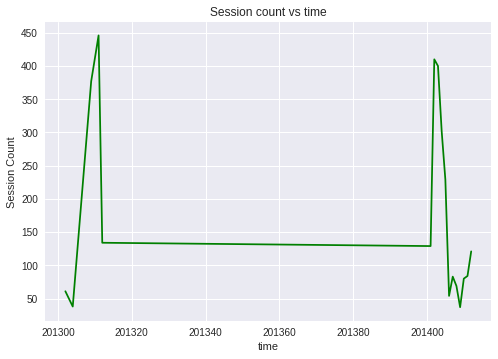

In [55]:


full_new_feat_1 = full_new_feat.reset_index()
#select the ids with alice_ids
print(full_new_feat_1.shape)
alice_sess_list = alice_ids['session_id'].values

full_new_feat_2 = full_new_feat_1[full_new_feat_1['session_id'].isin(alice_sess_list)]  
print(full_new_feat_2.shape)


full_new_feat_2 = full_new_feat_2.groupby('start_month').count().reset_index()

start_month = full_new_feat_2['start_month'].values

session_id = full_new_feat_2['session_id'].values

plt.plot(start_month, session_id, color='g')

plt.xlabel('time')
plt.ylabel('Session Count')
plt.title('Session count vs time')
plt.show()

In this way, we have an illustration and thoughts about the usefulness of the new feature, add it to the training sample and check the quality of the new model:

In [56]:
tmp = full_new_feat[['start_month']].values
print(tmp)

[[201301.]
 [201301.]
 [201301.]
 ...
 [201405.]
 [201405.]
 [201411.]]


In [57]:
idx_split

253561

In [58]:
full_sites_sparse

<336358x48371 sparse matrix of type '<class 'numpy.int64'>'
	with 1866898 stored elements in Compressed Sparse Row format>

In [59]:
# Add the new feature to the sparse matrix
tmp = full_new_feat[['start_month']].values
X_train = csr_matrix(hstack([full_sites_sparse[:idx_split,:], tmp[:idx_split,:]]))

# Compute the metric on the validation set
print(get_auc_lr_valid(X_train, y_train))

0.7508354860175162


The quality of the model has decreased significantly. We added a feature that definitely seemed useful to us, but its usage only worsened the model. Why did it happen?

### Important detour #2: is it necessary to scale features?

Here we give an intuitive reasoning (a rigorous mathematical justification for one or another aspect in linear models you can easily find on the internet). Consider the features more closely: those of them that correspond to the number of visits to a particular web-site per session vary from 0 to 10. The feature `start_month` has a completely different range: from 201301 to 201412, this means the contribution of this variable is significantly greater than the others. It would seem that problem can be avoided if we put less weight in a linear combination of attributes in this case, but in our case logistic regression with regularization is used (by default, this parameter is `C = 1`), which penalizes the model the stronger the greater its weights are. Therefore, for linear methods with regularization, it is recommended to convert features to the same scale (you can read more about the regularization, for example, [here](https://habrahabr.ru/company/ods/blog/322076/)).

One way to do this is standardization: for each observation you need to subtract the average value of the feature and divide this difference by the standard deviation:

$$ x^{*}_{i} = \dfrac{x_{i} - \mu_x}{\sigma_x}$$

The following practical tips can be given:
- It is recommended to scale features if they have essentially different ranges or different units of measurement (for example, the country's population is indicated in units, and the country's GNP in trillions)
- Scale features if you do not have a reason/expert opinion to give a greater weight to any of them
- Scaling can be excessive if the ranges of some of your features differ from each other, but they are in the same system of units (for example, the proportion of middle-aged people and people over 80 among the entire population)
- If you want to get an interpreted model, then build a model without regularization and scaling (most likely, its quality will be worse)
- Binary features (which take only values of 0 or 1) are usually left without conversion, (but)
- If the quality of the model is crucial, try different options and select one where the quality is better

Getting back to `start_month`, let us rescale the new feature and train the model again. This time the quality has increased:

In [60]:
full_new_feat.head(2)

,start_month
session_id,
21669,201301.0
54843,201301.0


In [61]:
# Add the new standardized feature to the sparse matrix
tmp = StandardScaler().fit_transform(full_new_feat[['start_month']])
X_train = csr_matrix(hstack([full_sites_sparse[:idx_split,:], tmp[:idx_split,:]]))

# Compute metric on the validation set
print(get_auc_lr_valid(X_train, y_train))

0.9196990680356892


##### 6. Add to the training set a new feature "n_unique_sites" – the number of the unique web-sites in a session. Calculate how the quality on the validation set has changed

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a2_q6__*

- It has decreased. It is better not to add a new feature.
- It has not changed.
- It has decreased. The new feature should be scaled.
- I am confused, and I do not know if it's necessary to scale a new feature.

*Tips: use the nunique() function from `pandas`. Do not forget to include the start_month in the set. Will you scale a new feature? Why?*

In [62]:
full_new_feat.head(2)

,start_month
session_id,
21669,201301.0
54843,201301.0


In [0]:
unique_count_1  = pd.DataFrame(index=full_df.index)

In [64]:
%%time
#Getting Unique Counts
unique_count = []
for row in full_sites.values:
    unique = np.unique (row)
    
    if 0 in unique:
        unique_count.append(len(unique) - 1)
    else:
        unique_count.append(len(unique))
unique_count = np.array(unique_count).reshape(-1,1)


CPU times: user 4 s, sys: 1.73 ms, total: 4 s
Wall time: 4 s


In [0]:
unique_count_1 = pd.DataFrame(unique_count, index = full_df.index)

In [0]:
full_new_feat['n_unique_sites'] = unique_count_1

In [67]:
full_new_feat.shape

(336358, 2)

In [68]:
full_new_feat.head(2)

,start_month,n_unique_sites
session_id,,
21669,201301.0,2
54843,201301.0,2


In [69]:
# Your code is here


# Add the new standardized feature to the sparse matrix
tmp = StandardScaler().fit_transform(full_new_feat[['start_month', 'n_unique_sites']])
X_train = csr_matrix(hstack([full_sites_sparse[:idx_split,:], tmp[:idx_split,:]]))

# Compute metric on the validation set
print(get_auc_lr_valid(X_train, y_train))


0.9161731796685169


So, the new feature has slightly decreased the quality, so we will not use it. Nevertheless, do not rush to throw features out because they haven't performed well. They can be useful in a combination with other features (for example, when a new feature is a ratio or a product of two others).

#####  7. Add two new features: start_hour and morning. Calculate the metric. Which of these features gives an improvement?

The `start_hour` feature is the hour at which the session started (from 0 to 23), and the binary feature `morning` is equal to 1 if the session started in the morning and 0 if the session started later (we assume that morning means `start_hour` is equal to 11 or less).

Will you scale the new features? Make your assumptions and test them in practice.

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a2_q7__*

- None of the features gave an improvement :(
- `start_hour` feature gave an improvement, and `morning` did not
- `morning` feature gave an improvement, and `start_hour` did not
- Both features gave an improvement

*Tip: find suitable functions for working with time series data in [documentation](http://pandas.pydata.org/pandas-docs/stable/api.html). Do not forget to include the `start_month` feature.*

In [0]:
# Your code is here

full_new_feat['start_hour']  =  full_df['time1'].apply(lambda ts: ts.hour) 
full_new_feat['morning']  = full_new_feat['start_hour'].apply(lambda x: 1 if ((x >= 7) & (x <= 11)) else 0 )


In [71]:
full_new_feat.head(2)

,start_month,n_unique_sites,start_hour,morning
session_id,,,,
21669,201301.0,2,8,1
54843,201301.0,2,8,1


In [72]:
# Add the new standardized feature to the sparse matrix
tmp = StandardScaler().fit_transform(full_new_feat[['start_month', 'n_unique_sites', 'start_hour','morning']])
X_train = csr_matrix(hstack([full_sites_sparse[:idx_split,:], tmp[:idx_split,:]]))

# Compute metric on the validation set
print(get_auc_lr_valid(X_train, y_train))

0.9559379060813782


### 5. Regularization and Parameter Tuning

We have introduced features that improve the quality of our model in comparison with the first baseline. Can we do even better? After we have changed the training and test sets, it almost always makes sense to search for the optimal hyperparameters - the parameters of the model that do not change during training.

For example, in week 3, you learned that, in decision trees, the depth of the tree is a hyperparameter, but the feature by which splitting occurs and its threshold is not. 

In the logistic regression that we use, the weights of each feature are changing, and we find their optimal values during training; meanwhile, the regularization parameter remains constant. This is the hyperparameter that we are going to optimize now.

Calculate the quality on a validation set with a regularization parameter, which is equal to 1 by default:

In [73]:
# Compose the training set
tmp_scaled = StandardScaler().fit_transform(full_new_feat[['start_month', 
                                                           'start_hour', 
                                                           'morning']])
X_train = csr_matrix(hstack([full_sites_sparse[:idx_split,:], 
                             tmp_scaled[:idx_split,:]]))

# Capture the quality with default parameters
score_C_1 = get_auc_lr_valid(X_train, y_train)
print(score_C_1)

0.9591502513175755


We will try to beat this result by optimizing the regularization parameter. We will take a list of possible values of C and calculate the quality metric on the validation set for each of C-values:

In [74]:
from tqdm import tqdm

# List of possible C-values
Cs = np.logspace(-3, 1, 10)
scores = []
for C in tqdm(Cs):
    scores.append(get_auc_lr_valid(X_train, y_train, C=C))

100%|██████████| 10/10 [00:56<00:00, 10.52s/it]


Plot the graph of the quality metric (AUC-ROC) versus the value of the regularization parameter. The value of quality metric corresponding to the default value of C=1 is represented by a horizontal dotted line:

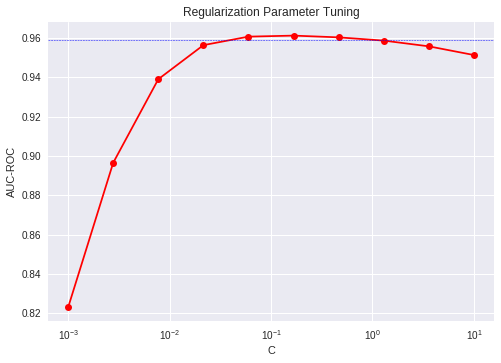

In [75]:
plt.plot(Cs, scores, 'ro-')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('AUC-ROC')
plt.title('Regularization Parameter Tuning')
# horizontal line -- model quality with default C value
plt.axhline(y=score_C_1, linewidth=.5, color='b', linestyle='dashed') 
plt.show()

##### 8. What is the value of parameter C (if rounded to 2 decimals) that corresponds to the highest model quality?

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a2_q8__*

- 0.17
- 0.46
- 1.29
- 3.14

In [0]:
# Your code is here


For the last task in this assignment: train the model using the optimal regularization parameter you found (do not round up to two digits like in the last question). If you do everything correctly and submit your solution, you should see `ROC AUC = 0.92784` on the public leaderboard ("A2 baseline 2"):

In [0]:
# Prepare the training and test data
tmp_scaled = StandardScaler().fit_transform(full_new_feat[['start_month', 'start_hour', 
                                                           'morning']])
X_train = csr_matrix(hstack([full_sites_sparse[:idx_split,:], 
                             tmp_scaled[:idx_split,:]]))
X_test = csr_matrix(hstack([full_sites_sparse[idx_split:,:], 
                            tmp_scaled[idx_split:,:]]))

# Train the model on the whole training data set using optimal regularization parameter
lr = LogisticRegression(C=C, random_state=17, solver='liblinear').fit(X_train, y_train)

# with C = 0.09 -- 0.92718(LB)
# Make a prediction for the test set
y_test = lr.predict_proba(X_test)[:, 1]

# Write it to the submission file
write_to_submission_file(y_test, 'baseline_2.csv')

In [0]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, GridSearchCV
time_split = TimeSeriesSplit(n_splits=10)

[(el[0].shape, el[1].shape) for el in time_split.split(X_train)]

logit = LogisticRegression(C=1, random_state=17, solver='liblinear')

In [78]:
%%time
cv_scores = cross_val_score(logit, X_train, y_train, cv=time_split, 
                            scoring='roc_auc', n_jobs=1) # hangs with n_jobs > 1, and locally this runs much faster

CPU times: user 37.2 s, sys: 312 ms, total: 37.5 s
Wall time: 37.5 s


In [79]:
cv_scores, cv_scores.mean()

(array([0.80969538, 0.74049299, 0.94992278, 0.97277799, 0.89898102,
        0.95081267, 0.9498438 , 0.92869503, 0.9601837 , 0.95607967]),
 0.9117485025829065)

In [80]:
logit.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=17, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
logit_test_pred = logit.predict_proba(X_test)[:, 1]
write_to_submission_file(logit_test_pred, 'subm1.csv') # 0.91288

In this part of the assignment, you have learned how to use sparse matrices, train logistic regression models, create new features and selected the best ones, learned why you need to scale features, and how to select hyperparameters. That's a lot!

In [82]:
full_time  =  full_df[times] 
full_time.head(3)

,time1,time2,time3,time4,time5,time6,time7,time8,time9,time10
session_id,,,,,,,,,,
21669,2013-01-12 08:05:57,2013-01-12 08:05:57,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
54843,2013-01-12 08:37:23,2013-01-12 08:37:23,2013-01-12 09:07:07,2013-01-12 09:07:09,NaT,NaT,NaT,NaT,NaT,NaT
77292,2013-01-12 08:50:13,2013-01-12 08:50:14,2013-01-12 08:50:15,2013-01-12 08:50:15,2013-01-12 08:50:16,2013-01-12 08:50:16,2013-01-12 08:50:16,2013-01-12 08:50:16,2013-01-12 08:50:17,2013-01-12 08:50:17


In [0]:
def get_total_time(row): 
    time_length = row.shape[0] - 1 
    i = time_length 
    while pd.isnull( row [ i ]): 
        i -= 1 
    return (row[i] - row[0]) / np.timedelta64(1,'s')

In [84]:
%%time

total_time = []
for row in full_time.values:
    total_time.append(get_total_time(row))
total_time = np.array(total_time).reshape(-1,1).astype(int)

CPU times: user 2.45 s, sys: 17 ms, total: 2.46 s
Wall time: 2.46 s


In [0]:
def  get_time_diff (row): 
    time_length = row.shape[0] - 1 
    time_diff = [0]*time_length 
    i = 0 
    while (i < time_length)and pd.notnull(row[i+1]): 
        time_diff[i] = (row[i+1] - row[i]) /np.timedelta64(1,'s') 
        i += 1 
    return  time_diff

In [86]:
%%time
time_diff = []
for row in full_time.values:
    time_diff.append (get_time_diff (row))
time_diff = np.log1p(np.array(time_diff).astype(float))

CPU times: user 19.3 s, sys: 157 ms, total: 19.5 s
Wall time: 19.5 s


In [0]:
## Appending The Newly Created Features
time_names = ['time_diff'+str(j) for j in range(1,10)] 
for ind, column_name in enumerate(time_names): 
    full_new_feat[column_name] = time_diff[:,ind] 

In [88]:
full_new_feat.head(2)

,start_month,n_unique_sites,start_hour,morning,time_diff1,time_diff2,time_diff3,time_diff4,time_diff5,time_diff6,time_diff7,time_diff8,time_diff9
session_id,,,,,,,,,,,,,
21669,201301.0,2,8,1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
54843,201301.0,2,8,1,0.0,7.487174,1.098612,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
def get_total_time(row): 
    time_length = row.shape[0] - 1 
    i = time_length 
    while pd.isnull( row [ i ]): 
        i -= 1 
    return (row[i] - row[0]) / np.timedelta64(1,'s')

In [90]:
%%time
total_time = []
for row in full_time.values:
    total_time.append(get_total_time(row))
total_time = np.array(total_time).reshape(-1,1).astype(int)

CPU times: user 2.37 s, sys: 6.94 ms, total: 2.38 s
Wall time: 2.38 s


In [91]:
for siteid, website in site_dict_2.items():
  if siteid == 77:
    print('{0} corresponds to {1}'.format(siteid, website))
  if siteid == 80:
    print('{0} corresponds to {1}'.format(siteid, website))

80 corresponds to s.youtube.com
77 corresponds to i1.ytimg.com


In [92]:
facebook_ids = []
youtube_ids = []
google_ids = []
twitter_ids = []
vk_ids = []
youwatch_ids = []
express_ids = []


for siteid, website in site_dict_2.items():  
    if 'facebook' in website:
        facebook_ids.append(siteid)
    if 'youtube' in website:
        youtube_ids.append(siteid)
    if 'twitter' in website:
        twitter_ids.append(siteid)
    if 'youwatch.org' in website:
        youwatch_ids.append(siteid)
    if 'vk.com' in website:
        vk_ids.append(siteid)
 
    if 'express.co' in website:
        express_ids.append(siteid)
print(youtube_ids)

[38132, 41285, 80, 38133, 15317, 656, 16672, 874, 6581, 38134, 24557, 1307, 12597, 76, 14774, 1345, 74, 16606, 28062, 2329, 1056, 676, 2574, 13347]


In [0]:
def is_site(x, l):
    if x in l:
      return 1 
    return 0

def is_long_session(x):
    if x < 3:
        return 0
    elif x < 5:
        return 1
    elif x < 10:
        return 2
    elif x < 30:
        return 3
    elif x < 40:
        return 4
    return 5

In [94]:
full_sites.values

array([[  56,   55,    0, ...,    0,    0,    0],
       [  56,   55,   56, ...,    0,    0,    0],
       [ 946,  946,  951, ...,  784,  949,  946],
       ...,
       [  29,   33,   35, ...,   21,   23, 6780],
       [5828,   23,   21, ...,  894,   21,  961],
       [  21, 1098, 1098, ..., 1098, 1098, 1098]])

In [95]:
full_df.columns

Index(['site1', 'time1', 'site2', 'time2', 'site3', 'time3', 'site4', 'time4',
       'site5', 'time5', 'site6', 'time6', 'site7', 'time7', 'site8', 'time8',
       'site9', 'time9', 'site10', 'time10'],
      dtype='object')

In [0]:
X_add = full_df[['time1']]
X_add['time1'] = full_df[['time1']].apply(pd.to_datetime)
X_add['time10'] = full_df[['time10']].fillna('2014-02-20 10:02:45').apply(pd.to_datetime)

# X_add['start_day'] = X_add['time1'].apply(pd.datetime.weekday)
# X_add['start_hour'] = X_add['time1'].apply(pd.to_datetime).apply(lambda x: x.hour)
# X_add['start_month'] = X_add['time1'].apply(lambda x: x.month)

X_add['stop_day'] = X_add['time10'].apply(pd.datetime.weekday)
X_add['stop_hour'] = X_add['time10'].apply(pd.to_datetime).apply(lambda x: x.hour)
X_add['stop_month'] = X_add['time10'].apply(lambda x: x.month)

# X_add['yb_start'] = full_df['site1'].apply(lambda x: is_site(x, youtube_ids))
# X_add['fb_start'] = full_df['site1'].apply(lambda x: is_site(x, facebook_ids))
# X_add['yw_start'] = full_df['site1'].apply(lambda x: is_site(x, youwatch_ids))
# X_add['vk_start'] = full_df['site1'].apply(lambda x: is_site(x, vk_ids))
# X_add['ex_start'] = full_df['site1'].apply(lambda x: is_site(x, express_ids))

# X_add['yb_end'] = full_df['site10'].apply(lambda x: is_site(x, youtube_ids))
# X_add['fb_end'] = full_df['site10'].apply(lambda x: is_site(x, facebook_ids))
# X_add['yw_end'] = full_df['site10'].apply(lambda x: is_site(x, youwatch_ids))
# X_add['vk_end'] = full_df['site10'].apply(lambda x: is_site(x, vk_ids))
# X_add['ex_end'] = full_df['site10'].apply(lambda x: is_site(x, express_ids))

X_add['duration'] = (X_add['time10'] - X_add['time1']).astype(int).apply(lambda x: x/10e8)

X_add = X_add.drop(columns=['time1', 'time10'])

X_add['duration'] = X_add['duration'].apply(is_long_session).astype(int)

# X_add['n_unique_sites'] = full_new_feat['n_unique_sites'] 

In [97]:
X_add.columns

Index(['stop_day', 'stop_hour', 'stop_month', 'duration'], dtype='object')

In [0]:
#dummy encoding for additional features
X_add = pd.get_dummies(X_add, columns=X_add.columns)

In [99]:
X_add.columns

Index(['stop_day_0', 'stop_day_1', 'stop_day_2', 'stop_day_3', 'stop_day_4',
       'stop_day_5', 'stop_day_6', 'stop_hour_7', 'stop_hour_8', 'stop_hour_9',
       'stop_hour_10', 'stop_hour_11', 'stop_hour_12', 'stop_hour_13',
       'stop_hour_14', 'stop_hour_15', 'stop_hour_16', 'stop_hour_17',
       'stop_hour_18', 'stop_hour_19', 'stop_hour_20', 'stop_hour_21',
       'stop_hour_22', 'stop_hour_23', 'stop_month_1', 'stop_month_2',
       'stop_month_3', 'stop_month_4', 'stop_month_5', 'stop_month_6',
       'stop_month_7', 'stop_month_8', 'stop_month_9', 'stop_month_10',
       'stop_month_11', 'stop_month_12', 'duration_0', 'duration_1',
       'duration_2', 'duration_3', 'duration_4', 'duration_5'],
      dtype='object')

In [100]:
X_add.head(2)

,stop_day_0,stop_day_1,stop_day_2,stop_day_3,stop_day_4,stop_day_5,stop_day_6,stop_hour_7,stop_hour_8,stop_hour_9,...,stop_month_9,stop_month_10,stop_month_11,stop_month_12,duration_0,duration_1,duration_2,duration_3,duration_4,duration_5
session_id,,,,,,,,,,,,,,,,,,,,,
21669,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
54843,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [0]:
full_new_feat['total_time'] =  total_time 
full_new_feat['total_time'] =  np.log1p(full_new_feat['total_time'].values)

In [0]:
# Your code is here
full_new_feat['day']  = full_new_feat['start_hour'].apply(lambda x: 1 if ((x >= 12) & (x <= 18)) else 0 )

full_new_feat['evening']  = full_new_feat['start_hour'].apply(lambda x: 1 if ((x >= 19) & (x <= 23)) else 0 )

full_new_feat['night']  = full_new_feat['start_hour'].apply(lambda x: 1 if ((x >= 0) & (x <= 6)) else 0 )

full_new_feat['holiday']     = (full_df['time1'].dt.dayofweek >= 5).astype(int) 

full_new_feat['day_of_week'] = (full_df['time1'].dt.dayofweek).astype(int)

full_new_feat['work_hours'] = full_df['time1'].apply(lambda ts: 1 if (ts.date().weekday() in (0,1,2,3,4)) &
                                             ((ts.hour>=8)&(ts.hour<=17)&(ts.hour!=12)) else 0)

full_new_feat['year'] = full_df['time1'].apply(lambda ts: ts.year)
full_new_feat['month'] = full_df['time1'].apply(lambda ts: ts.month)

In [103]:
full_new_feat.head(3)

,start_month,n_unique_sites,start_hour,morning,time_diff1,time_diff2,time_diff3,time_diff4,time_diff5,time_diff6,...,time_diff9,total_time,day,evening,night,holiday,day_of_week,work_hours,year,month
session_id,,,,,,,,,,,,,,,,,,,,,
21669,201301.0,2,8,1,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0,0,0,1,5,0,2013,1
54843,201301.0,2,8,1,0.000000,7.487174,1.098612,0.000000,0.0,0.0,...,0.0,7.488294,0,0,0,1,5,0,2013,1
77292,201301.0,6,8,1,0.693147,0.693147,0.000000,0.693147,0.0,0.0,...,0.0,1.609438,0,0,0,1,5,0,2013,1


In [104]:
%%time
#Getting Unique Counts
unique_count = []
for row in full_sites.values:
    unique = np.unique (row)
    if 0 in unique:
        unique_count.append(len(unique) - 1)
    else:
        unique_count.append(len(unique))
unique_count = np.array(unique_count).reshape(-1,1)

CPU times: user 4.05 s, sys: 3.95 ms, total: 4.06 s
Wall time: 4.06 s


In [0]:
full_new_feat['unique_count'] = pd.DataFrame(data = unique_count ,columns = ['unique'],index = full_df.index ) #my features dataframe

In [0]:
full_new_feat['unique_count'] =  unique_count 
# full_new_feat['unique_count'] =  np.log1p(full_new_feat['unique_count'].values)

In [107]:
full_new_feat.columns

Index(['start_month', 'n_unique_sites', 'start_hour', 'morning', 'time_diff1',
       'time_diff2', 'time_diff3', 'time_diff4', 'time_diff5', 'time_diff6',
       'time_diff7', 'time_diff8', 'time_diff9', 'total_time', 'day',
       'evening', 'night', 'holiday', 'day_of_week', 'work_hours', 'year',
       'month', 'unique_count'],
      dtype='object')

In [108]:
np.unique(full_new_feat['n_unique_sites'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [109]:
full_sites.head(2)

,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10
session_id,,,,,,,,,,
21669,56,55,0,0,0,0,0,0,0,0
54843,56,55,56,55,0,0,0,0,0,0


In [110]:
site_dict  =  {} 
for  row  in  full_sites.values : 
    for  site_id  in  np.unique (row): 
        if  site_id  in  site_dict : 
            site_dict [site_id]  +=  1 
        else : 
            site_dict [site_id]  =  1 
site_dict.pop(0)

30500

In [111]:
site_dict.pop(34)

881

In [112]:
%%time
top_10 = sorted (list (site_dict.items ()), key = lambda tup: tup [1], reverse = True) [: 10]
top_10 = [element [0] for element in top_10]
have_top_10 = np.zeros ((full_sites.shape [0], 1), dtype = int)
ind = 0
for row in full_sites.values:
    unique = np.unique (row)
    for site_id in unique:
        if site_id in top_10:
            have_top_10[ind] = 1
    ind += 1

have_top_10

CPU times: user 3.7 s, sys: 3.96 ms, total: 3.7 s
Wall time: 3.71 s


In [0]:
full_new_feat ['have_top_10']  =  have_top_10

In [114]:
full_new_feat.head(2)

,start_month,n_unique_sites,start_hour,morning,time_diff1,time_diff2,time_diff3,time_diff4,time_diff5,time_diff6,...,day,evening,night,holiday,day_of_week,work_hours,year,month,unique_count,have_top_10
session_id,,,,,,,,,,,,,,,,,,,,,
21669,201301.0,2,8,1,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0,0,0,1,5,0,2013,1,2,0
54843,201301.0,2,8,1,0.0,7.487174,1.098612,0.0,0.0,0.0,...,0,0,0,1,5,0,2013,1,2,0


In [115]:
 X_add.values[:idx_split,:]

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [926]:
# Prepare the training and test data
tmp_scaled = StandardScaler().fit_transform(full_new_feat[['start_month','start_hour',
                                                           'morning','day', 'evening',                                                           
                                                          'holiday',	'day_of_week','work_hours'
                                                           ]])
X_train = csr_matrix(hstack([full_sites_sparse[:idx_split,:], tmp_scaled[:idx_split,:],  X_add.values[:idx_split,:]]))
X_test = csr_matrix(hstack([full_sites_sparse[idx_split:,:], tmp_scaled[idx_split:,:],  X_add.values[idx_split:,:]]))

# Train the model on the whole training data set using optimal regularization parameter
lr = LogisticRegression(C=C, random_state=17, solver='liblinear').fit(X_train, y_train)

# Capture the quality with default parameters
score_C_1 = get_auc_lr_valid(X_train, y_train)
print(score_C_1)

# with C = 0.09 -- 0.92718(LB)
# Make a prediction for the test set
y_test = lr.predict_proba(X_test)[:, 1]

# Write it to the submission file
write_to_submission_file(y_test, 'baseline_4.csv')
# 0.9684064913844325
# 0.9743164850320518
# 0.9744605005096396
# 0.9877728746093165
#0.9878328055785015
# 0.9880018803530282
# 0.988139102647711

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


0.988139102647711


In [0]:
from sklearn import model_selection, preprocessing, metrics, ensemble
import lightgbm as lgb

In [0]:
def runLGB(train_X, train_y, test_X, test_y=None, test_X2=None): 
    params = {}
    params["objective"] = "binary"
    params['metric'] = 'auc'
    params["max_depth"] = 4
    params["min_data_in_leaf"] = 100
    params["learning_rate"] = 0.001
    params["bagging_fraction"] = 0.7
    params["feature_fraction"] = 0.7
    params["bagging_freq"] = 5
    params["bagging_seed"] = 0
    params["verbosity"] = -1
    num_rounds = 10000

    plst = list(params.items())
    lgtrain = lgb.Dataset(train_X, label=train_y)

    if test_y is not None:
        lgtest = lgb.Dataset(test_X, label=test_y)
        model = lgb.train(params, lgtrain, num_rounds, valid_sets=[lgtest], early_stopping_rounds=100, verbose_eval=50)
    else:
        lgtest = lgb.DMatrix(test_X)
        model = lgb.train(params, lgtrain, num_rounds)

    pred_test_y = model.predict(test_X, num_iteration=model.best_iteration)
    pred_test_y2 = model.predict(test_X2, num_iteration=model.best_iteration)

    loss = 0
    if test_y is not None:
        loss = metrics.roc_auc_score(test_y, pred_test_y)
        print(loss)
        return pred_test_y, loss, pred_test_y2
    else:
        return pred_test_y, loss, pred_test_y2

In [0]:
# train_new = train_df.reset_index()

In [670]:
train_new.columns

Index(['session_id', 'site1', 'time1', 'site2', 'time2', 'site3', 'time3',
       'site4', 'time4', 'site5', 'time5', 'site6', 'time6', 'site7', 'time7',
       'site8', 'time8', 'site9', 'time9', 'site10', 'time10', 'target'],
      dtype='object')

In [0]:
# cv_scores = []
# pred_test_full = 0
# kf = model_selection.GroupKFold(n_splits=5)
# for dev_index, val_index in kf.split(train_new, train_new["target"].values, train_new["session_id"].values):
#     print(train_new["session_id"].loc[val_index].unique())
#     dev_X, val_X = X_train[dev_index,:], X_train[val_index,:]
#     dev_y, val_y = y_train[dev_index], y_train[val_index]
    
#     pred_val, loss, pred_test = runLGB(dev_X, dev_y, val_X, val_y, X_test)
#     cv_scores.append(loss)
#     pred_test_full += pred_test
#     print(cv_scores)
# pred_test_full /= 5.

In [0]:
def runXGB(train_X, train_y, test_X, test_y=None, test_X2=None, seed_val=0, rounds=500, dep=8, eta=0.05):
    params = {}
    params["objective"] = "binary:logistic"
    params['eval_metric'] = 'auc'
    params["eta"] = eta
    params["subsample"] = 0.7
    params["min_child_weight"] = 1
    params["colsample_bytree"] = 0.7
    params["max_depth"] = dep
    params["silent"] = 1
    params["seed"] = seed_val
    #params["max_delta_step"] = 2
    #params["gamma"] = 0.5
    num_rounds = rounds

    plst = list(params.items())
    xgtrain = xgb.DMatrix(train_X, label=train_y)

    xgtest = xgb.DMatrix(test_X, label=test_y)
    watchlist = [ (xgtrain,'train'), (xgtest, 'test') ]
    model = xgb.train(plst, xgtrain, num_rounds, watchlist, early_stopping_rounds=100, verbose_eval=20)


    pred_test_y = model.predict(xgtest, ntree_limit=model.best_ntree_limit)
    pred_test_y2 = model.predict(xgb.DMatrix(test_X2), ntree_limit=model.best_ntree_limit)
    
    loss = metrics.roc_auc_score(test_y, pred_test_y)
    return pred_test_y, loss, pred_test_y2

In [0]:
# import xgboost as xgb
# cv_scores = []
# pred_test_full = 0
# kf = model_selection.GroupKFold(n_splits=5)
# for dev_index, val_index in kf.split(train_new, train_new["target"].values, train_new["session_id"].values):
#     print(train_new["session_id"].loc[val_index].unique())
#     dev_X, val_X = X_train[dev_index,:], X_train[val_index,:]
#     dev_y, val_y = y_train[dev_index], y_train[val_index]
    
#     pred_val, loss, pred_test = runXGB(dev_X, dev_y, val_X, val_y, X_test)
#     cv_scores.append(loss)
#     pred_test_full += pred_test
#     print(cv_scores)
# pred_test_full /= 5.

In [0]:
def runRF(train_X, train_y, test_X, test_y=None, test_X2=None, depth=20, leaf=10, feat=0.2):
    model = ensemble.RandomForestClassifier(
            n_estimators = 1000,
                    max_depth = depth,
                    min_samples_split = 2,
                    min_samples_leaf = leaf,
                    max_features =  feat,
                    n_jobs = 4,
                    random_state = 0)
    model.fit(train_X, train_y)
    train_preds = model.predict_proba(train_X)[:,1]
    test_preds = model.predict_proba(test_X)[:,1]
    test_preds2 = model.predict_proba(test_X2)[:,1]
    test_loss = 0
    
    train_loss = metrics.log_loss(train_y, train_preds)
    test_loss = metrics.log_loss(test_y, test_preds)
    print("Train and Test loss : ", train_loss, test_loss)
    return test_preds, test_loss, test_preds2

In [0]:
# # import RandomForestClassifier as rf
# cv_scores = []
# pred_test_full = 0
# kf = model_selection.GroupKFold(n_splits=5)
# for dev_index, val_index in kf.split(train_new, train_new["target"].values, train_new["session_id"].values):
#     print(train_new["session_id"].loc[val_index].unique())
#     dev_X, val_X = X_train[dev_index,:], X_train[val_index,:]
#     dev_y, val_y = y_train[dev_index], y_train[val_index]
    
#     pred_val, loss, pred_test = runRF(dev_X, dev_y, val_X, val_y, X_test)
#     cv_scores.append(loss)
#     pred_test_full += pred_test
#     print(cv_scores)
# pred_test_full /= 5.

In [0]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=1, max_depth=30, n_estimators=200)
model_rf.fit(X_train, y_train)


pred_test = model_rf.predict_proba(X_test)[:,1]
# score = accuracy_score(Y_test,pred_test)
# print('accuracy_score',score)

### Check Class Imbalance

In [0]:
plt.figure(figsize=(9,7))
train_df['target'].value_counts().plot(kind = 'bar', label = 'Intruder')
plt.legend()
print(train_df['target'].value_counts())

### Correlation table of the dataset

In [0]:
full_new_feat.head(2)

In [0]:
corr = full_new_feat.corr('spearman') 
plt.figure(figsize = ( 12 , 12 )) 
sns.heatmap(corr,annot=True,fmt='.2f',cmap="YlGnBu");

In [0]:
# plt.figure(figsize=(20, 6))
# plt.subplot(1, 3, 1)
# sns.countplot(x="day_of_week", hue="target", data=time_df)
# plt.subplot(1, 3, 2)
# plt.title('Alice day of weeks')
# sns.countplot(x="day_of_week", data=time_df[time_df['target']==1])
# plt.subplot(1, 3, 3)
# plt.title('Intruder day of weeks')
# sns.countplot(x="day_of_week", data=time_df[time_df['target']==0])
# plt.tight_layout()

In [942]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline


def get_auc_lr_valid_1(X, y, C=1.0, seed=17, ratio = 0.9):
  # Split the data into the training and validation sets
    idx = int(round(X.shape[0] * ratio))
    pipe = make_pipeline(
      SMOTE(),
      LogisticRegression(C=C, random_state=seed, solver='liblinear').fit(X[:idx, :], y[:idx])
    )
    
#     # Classifier training
#     lr = LogisticRegression(C=C, random_state=seed, solver='liblinear').fit(X[:idx, :], y[:idx])
    # Prediction for validation set
    y_pred = pipe.predict_proba(X[idx:, :])[:, 1]
    # Calculate the quality
    score = roc_auc_score(y[idx:], y_pred)
    
    return score

# Capture the quality with default parameters
score_C_1 = get_auc_lr_valid_1(X_train, y_train,  1)
print(score_C_1)

# # with C = 0.09 -- 0.92718(LB)
# # Make a prediction for the test set
# y_test = lr.predict_proba(X_test)[:, 1]

# # Write it to the submission file
# write_to_submission_file(y_test, 'baseline_4.csv')

#0.09 -- 0.9894011250718568

0.988139102647711


## tune regularization parameter C.

In [943]:
time_split

TimeSeriesSplit(max_train_size=None, n_splits=10)

In [0]:
# c_values = np.logspace(-2, 2, 10)
c_values = np.logspace(-1, 1, 20)



logit_grid_searcher = GridSearchCV(estimator=logit, param_grid={'C': c_values},
                                  scoring='roc_auc', n_jobs=1, cv=time_split, verbose=1)




In [934]:
%%time
logit_grid_searcher.fit(X_train, y_train)

logit_grid_searcher.best_score_, logit_grid_searcher.best_params_

logit_test_pred3 = logit_grid_searcher.predict_proba(X_test)[:, 1]
write_to_submission_file(logit_test_pred3, 'subm7.csv') # 0.94242 #0.94201

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed: 19.4min finished


CPU times: user 19min 28s, sys: 2.98 s, total: 19min 31s
Wall time: 19min 32s


In [117]:
full_sites = full_df[sites].astype('str')
lst = full_sites[sites].as_matrix().tolist()
flat_list = [' '.join(sublist) for sublist in lst]
vect = TfidfVectorizer(ngram_range=(1,4), max_features=100000,analyzer='char_wb')
tfidf_matrix = vect.fit_transform(flat_list)

X_train_tf = tfidf_matrix[:idx_split]
X_test_tf  = tfidf_matrix[idx_split:]

X_train_tf.shape, X_test_tf.shape

((253561, 13321), (82797, 13321))

In [118]:
# Prepare the training and test data
tmp_scaled = StandardScaler().fit_transform(full_new_feat[['start_month','start_hour',
                                                           'morning','day', 'evening',                                                           
                                                          'holiday',	'day_of_week','work_hours'
                                                           ]])

x_train_full  =  csr_matrix(hstack([X_train_tf,tmp_scaled[:idx_split,:],
                                   X_add.values[:idx_split,:]])) 
x_test_full   =  csr_matrix(hstack([X_test_tf , tmp_scaled[idx_split:,:], 
                                   X_add.values[idx_split:,:]])) 

print(x_train_full.shape,x_test_full.shape)


target = train_df['target']
X_train , X_valid , y_train , y_valid = train_test_split(x_train_full,target ,test_size=0.2) 
tscv = TimeSeriesSplit(n_splits = 5);


print(tscv)

(253561, 13371) (82797, 13371)
TimeSeriesSplit(max_train_size=None, n_splits=5)


In [119]:
[(el[0].shape, el[1].shape) for el in tscv.split(X_train)]

[((33808,), (33808,)),
 ((67616,), (33808,)),
 ((101424,), (33808,)),
 ((135232,), (33808,)),
 ((169040,), (33808,))]

In [120]:
%%time
clf_lr = LogisticRegression (random_state = 42, n_jobs=1, solver='lbfgs', max_iter=8000)
clf_lr.fit (X_train, y_train)
preds_lr = clf_lr.predict_proba (X_valid)[:, 1]
print ('Train test split LogisticRegression score:% s ROC AUC'% round (roc_auc_score (y_valid, preds_lr), 4))
cross_score_lr = np.mean (cross_val_score (clf_lr, x_train_full, target, scoring = 'roc_auc', cv = tscv))
print ('Cross validation LogisticRegression score:% s ROC AUC'% round (cross_score_lr, 4))

Train test split LogisticRegression score:0.9868 ROC AUC
Cross validation LogisticRegression score:0.9407 ROC AUC
CPU times: user 2min 16s, sys: 1min 23s, total: 3min 40s
Wall time: 1min 50s


In [121]:
%%time
clf_rf = RandomForestClassifier (random_state = 42, n_estimators = 100)
clf_rf.fit (X_train, y_train)
preds_rf = clf_rf.predict_proba (X_valid) [:, 1]
print ('Train test split RandomForestClassifier score:% s ROC AUC'% round (roc_auc_score (y_valid, preds_rf), 4))
cross_score_rf = np.mean (cross_val_score (clf_rf, x_train_full, target, scoring = 'roc_auc', cv = tscv))
print ('Cross validation RandomForestClassifier score:% s ROC AUC'% round (cross_score_rf, 4))

Train test split RandomForestClassifier score:0.9864 ROC AUC
Cross validation RandomForestClassifier score:0.8585 ROC AUC
CPU times: user 14min 20s, sys: 850 ms, total: 14min 21s
Wall time: 14min 21s


In [122]:
%%time
reg_xgb = xgb.XGBRegressor(10, 0.1, 1000, objective= 'binary:logistic', random_state = 42, booster = 'gblinear',scale_pos_weight = 109)
reg_xgb.fit(X_train, y_train)
preds_xgb_reg = reg_xgb.predict(X_valid)
print ('Train test split XGBRegressor score:% s ROC AUC'% round (roc_auc_score (y_valid, preds_xgb_reg), 4))
cross_score_xgb_reg = np.mean (cross_val_score (reg_xgb, x_train_full, target, scoring = 'roc_auc', cv = tscv))
print ('Cross validation XGBRegressor score:% s ROC AUC'% round (cross_score_xgb_reg, 4))

Train test split XGBRegressor score:0.992 ROC AUC
Cross validation XGBRegressor score:0.93 ROC AUC
CPU times: user 12min, sys: 1.5 s, total: 12min 2s
Wall time: 12min 2s


In [123]:
%%time
clf_xgb = xgb.XGBClassifier (random_state = 42, booster = 'gblinear')
clf_xgb.fit (X_train, y_train)
preds_xgb = clf_xgb.predict_proba (X_valid) [:, 1]
print ('Train test split XGBClassifier score:% s ROC AUC'% round (roc_auc_score (y_valid, preds_xgb), 4))
cross_score_xgb = np.mean (cross_val_score (clf_xgb, x_train_full, target, scoring = 'roc_auc', cv = tscv))
print ('Cross validation XGBClassifier score:% s ROC AUC'% round (cross_score_xgb, 4))

Train test split XGBClassifier score:0.9857 ROC AUC
Cross validation XGBClassifier score:0.9412 ROC AUC
CPU times: user 1min 31s, sys: 1.28 s, total: 1min 32s
Wall time: 1min 32s


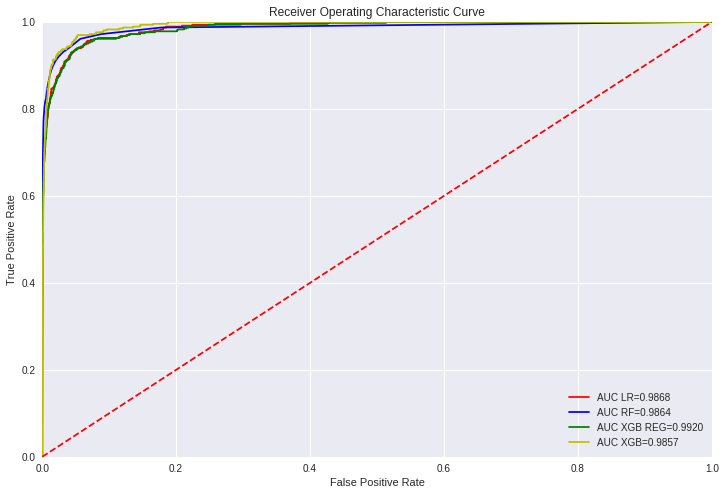

In [124]:
fpr_lr,tpr_lr,threshold=roc_curve(y_valid,preds_lr)
roc_auc_lr = auc(fpr_lr,tpr_lr)

fpr_rf,tpr_rf,threshold=roc_curve(y_valid,preds_rf)
roc_auc_rf = auc(fpr_rf,tpr_rf)

fpr_xgb_reg,tpr_xgb_reg,threshold=roc_curve(y_valid,preds_xgb_reg)
roc_auc_xgb_reg = auc(fpr_xgb_reg,tpr_xgb_reg)

fpr_xgb,tpr_xgb,threshold=roc_curve(y_valid,preds_xgb)
roc_auc_xgb = auc(fpr_xgb,tpr_xgb)

plt.figure(figsize=(12,8))
plt.title('Receiver Operating Characteristic Curve')
plt.plot(fpr_lr, tpr_lr,'r', label='AUC LR=%0.4f'%roc_auc_lr)
plt.plot(fpr_rf, tpr_rf,'b', label='AUC RF=%0.4f'%roc_auc_rf)
plt.plot(fpr_xgb, tpr_xgb,'g', label='AUC XGB REG=%0.4f'%roc_auc_xgb_reg)
plt.plot(fpr_xgb_reg, tpr_xgb_reg, 'y', label='AUC XGB=%0.4f'%roc_auc_xgb)
plt.legend(loc='lowerright')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');

In [0]:
def show_confusion_matrix(y_true,y_pred,title='Confusionmatrix'):
    table=confusion_matrix(y_true.values,y_pred)
    fig,ax=plt.subplots(frameon=False)
    fig.set_size_inches(4,3)
    fig.suptitle(title,fontsize=20)
    ax.axis('off')
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

    the_table=ax.table(cellText=table,
                        colWidths=[0.5]*len([0,1]),
                        rowLabels=['True 0','True 1'],colLabels=['Predicted 0','Predicted 1'],
                        cellLoc='center',rowLoc='center',loc="center")
    the_table.set_fontsize(34)
    the_table.scale(1,4)
    plt.show()

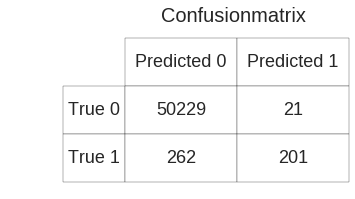

In [126]:
show_confusion_matrix(y_valid, clf_lr.predict(X_valid))

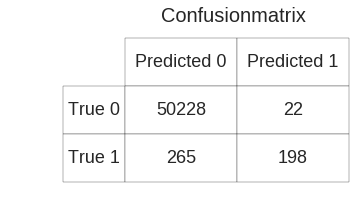

In [127]:
show_confusion_matrix(y_valid, clf_xgb.predict(X_valid))

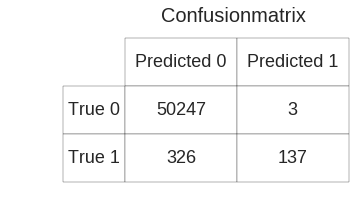

In [128]:
show_confusion_matrix(y_valid, clf_rf.predict(X_valid))

In [0]:
def get_auc_lr_valid(X, y, C=1.0, seed=17, ratio = 0.9):
    # Split the data into the training and validation sets
    idx = int(round(X.shape[0] * ratio))
    # Classifier training
    lr = LogisticRegression(C=C, random_state=seed,max_iter=8000,n_jobs=1,solver='lbfgs').fit(X[:idx, :], y[:idx])
    # Prediction for validation set
    y_pred = lr.predict_proba(X[idx:, :])[:, 1]
    # Calculate the quality
    score = roc_auc_score(y[idx:], y_pred)
    return score

In [130]:
%%time
from tqdm import tqdm
# List of possible C-values
Cs = np.logspace(-1, 1, 20)

scores = []

for C in tqdm(Cs):
     scores.append(get_auc_lr_valid(X_train, y_train, C=C))

100%|██████████| 20/20 [09:28<00:00, 48.64s/it]

CPU times: user 11min 41s, sys: 7min 7s, total: 18min 48s
Wall time: 9min 28s


In [132]:
scores, max(scores), Cs[np.argmax(scores)]

([0.9693343219878805,
  0.9717123357659156,
  0.9739456357696071,
  0.9759315046434129,
  0.97774938784201,
  0.9793484616738541,
  0.9808137889490035,
  0.982118620356119,
  0.9832931826170136,
  0.9843337308280998,
  0.9852651418489231,
  0.9860101101697136,
  0.9866408589310869,
  0.9871918947446698,
  0.9876669625140501,
  0.9880508151317644,
  0.9884017660965319,
  0.9887013583835285,
  0.9889471845547336,
  0.9891488743622295],
 0.9891488743622295,
 10.0)

In [133]:
final_model = LogisticRegression(random_state = 17, C = Cs[np.argmax(scores)],n_jobs=1) 
final_model.fit(X_train,y_train) 
print('ROC_AUC on the test sample: {} '.format(round(roc_auc_score(y_valid,final_model.predict_proba(X_valid)[:,1]),4)))

ROC_AUC on the test sample: 0.992 


In [0]:
# Function for writing predictions to a file
def write_to_submission_file(predicted_labels, out_file,
                             target='target', index_label="session_id"):
    predicted_df = pd.DataFrame(predicted_labels,
                                index = np.arange(1, predicted_labels.shape[0] + 1),
                                columns=[target])
    predicted_df.to_csv(out_file, index_label=index_label)

In [0]:
preds = final_model.predict_proba(x_test_full)[:,1]

In [0]:
preds = np.where(preds > 0.945, 0.985, preds)

In [0]:
write_to_submission_file(preds,'re-git_v4.csv')

# Part 2. Freeride

<img src='https://github.com/shravankoninti/mlcourse.ai-1/blob/master/img/snowboard.jpg?raw=1' width=70%>

*Yorko in Sheregesh, the best place in Russia for snowboarding and skiing.*

In this part, you'll need to beat the 2 more baselines mentioned in the beginning of this assignment. No more step-by-step instructions. But it'll be very helpful for you to study the Kernel "[Correct time-aware cross-validation scheme](https://www.kaggle.com/kashnitsky/correct-time-aware-cross-validation-scheme)".

Here are a few tips for finding new features: think about what you can come up with using existing features, try multiplying or dividing two of them, justify or decline your hypotheses with plots, extract useful information from time series data (time1 ... time10), do not hesitate to convert an existing feature (for example, take a logarithm), etc. Checkout other [Kernels](https://www.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2/kernels). We encourage you to try new ideas and models - it's fun!

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a2_alice__*

When you get into Kaggle and Xgboost, you'll feel like that, and it's OK :)

<img src='https://github.com/shravankoninti/mlcourse.ai-1/blob/master/img/xgboost_meme.jpg?raw=1' width=50%>

*More nerdy jokes in the thread ["Nerd Laughing Loud"](https://www.kaggle.com/general/76963)*

# Relax? Not yet

That's it for this part of assignment 2. More credits will be given to the top 10 performers in this competition (from among current participants), check [course roadmap](https://mlcourse.ai/roadmap). Do not spoil the assignment and the competition - don't share high-performing kernels (with LB ROC AUC >= 0.95).